In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objects as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
sales = pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Downloads\Sales.csv")
sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [3]:
sales.info

<bound method DataFrame.info of               Date  Day     Month  Year  Customer_Age       Age_Group  \
0       2013-11-26   26  November  2013            19     Youth (<25)   
1       2015-11-26   26  November  2015            19     Youth (<25)   
2       2014-03-23   23     March  2014            49  Adults (35-64)   
3       2016-03-23   23     March  2016            49  Adults (35-64)   
4       2014-05-15   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  2016-04-12   12     April  2016            41  Adults (35-64)   
113032  2014-04-02    2     April  2014            18     Youth (<25)   
113033  2016-04-02    2     April  2016            18     Youth (<25)   
113034  2014-03-04    4     March  2014            37  Adults (35-64)   
113035  2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0             

Text(0.5, 1.0, 'Number of Customers Per Country')

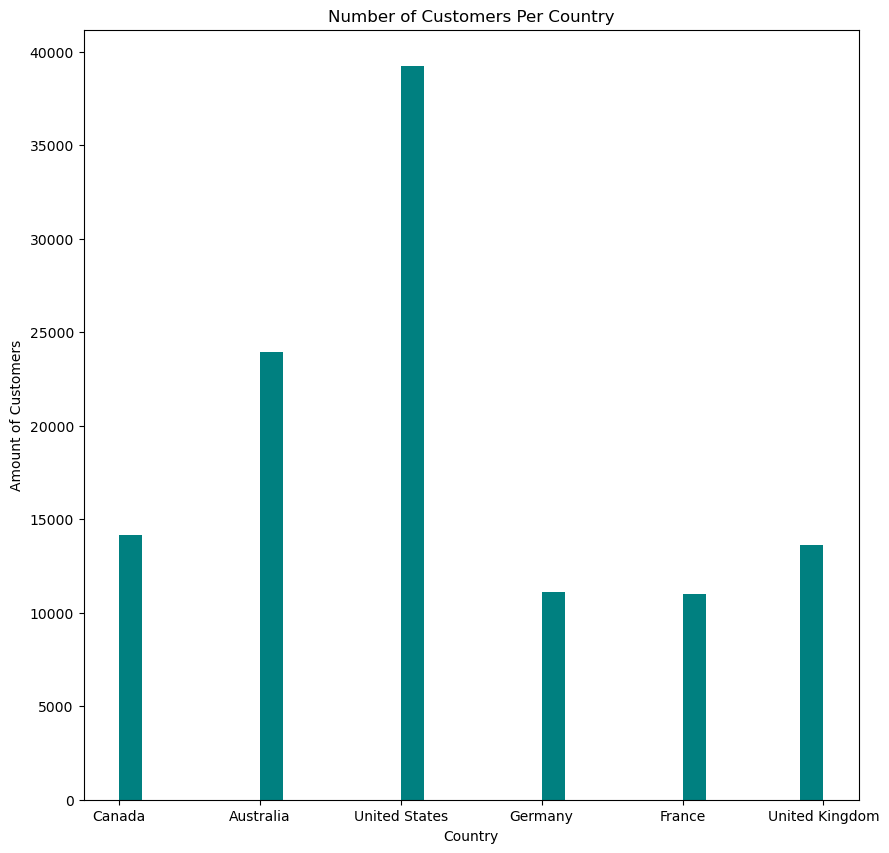

In [4]:
# There are some missing values so the descriptive statistics might not be the best way to learn about the dataset. 
# We try other ways like univariate or multivariate statistics
# Starting off with univariate statistics, we try representing the data in a histogram
plt.figure(figsize = (10,10))
plt.hist(sales['Country'], bins=30, color='Teal')
plt.xlabel("Country")
plt.ylabel("Amount of Customers")
plt.title("Number of Customers Per Country")

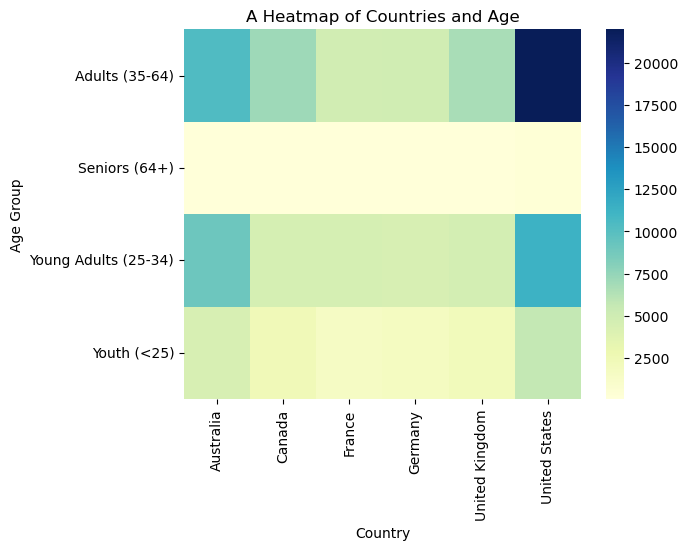

In [5]:
# We explore other tools that might come in handy such as heatmaps, scatterplots, boxplots and histograms.
pivot_table = sales.pivot_table(index = 'Age_Group', columns = 'Country', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, cmap = "YlGnBu", fmt = 'd')
plt.title("A Heatmap of Countries and Age")
plt.xlabel("Country")
plt.ylabel("Age Group")
plt.show()

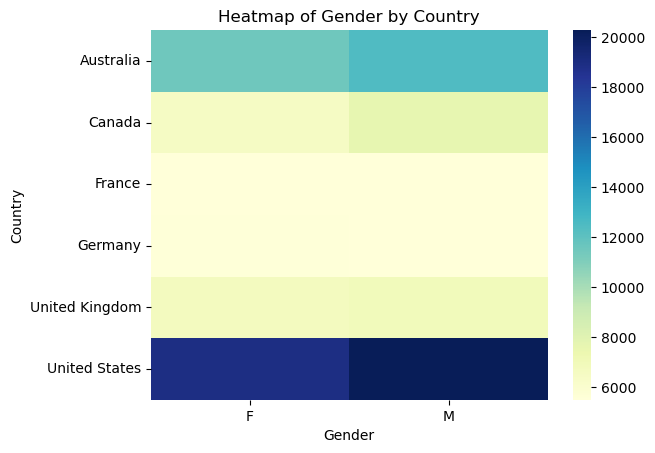

In [6]:
# From this heatmap, we can deduce the ages for customers by each country.
# For example, most customers from the United States fell into the Adults category(35-64), this trend carries on for most of the countries.
# We can do the same for the states and see how this changes.
pivot_table = sales.pivot_table(index = 'Country', columns = 'Customer_Gender', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, cmap = "YlGnBu", fmt = 'd')
plt.title("Heatmap of Gender by Country")
plt.xlabel("Gender")
plt.ylabel("Country")
plt.show()

Text(0.5, 0, 'Gender')

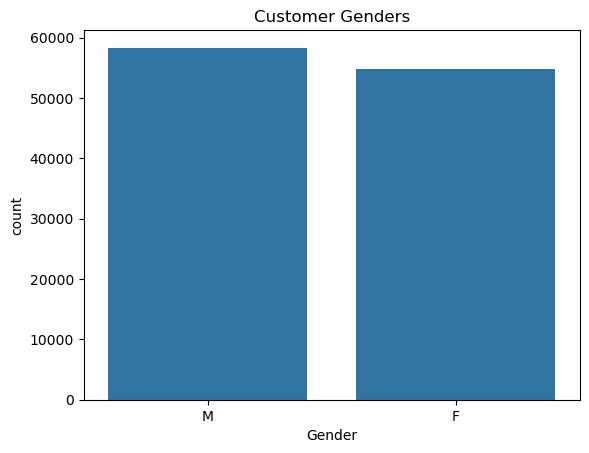

In [7]:
# From the countplot generated below, we can see that men are more likey to purchase bikes and bike equipment than women,
# but the difference isn't that huge. Let's ook for ways to diferentiate this data
sns.countplot(x = sales['Customer_Gender'])
plt.title("Customer Genders")
plt.xlabel("Gender")

Text(0.5, 1.0, 'Sales Distribution per Year')

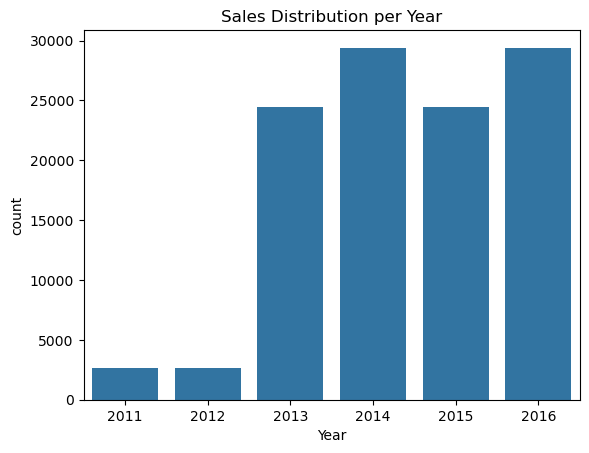

In [8]:
# The countplot below of years shows that 2014 and 2016 were the best years for the business while 2011 and 2012 were slow
# This could possibly mean the shop openned around 2011, hence why the figures are that low
sns.countplot(x = sales['Year'])
plt.title("Sales Distribution per Year")

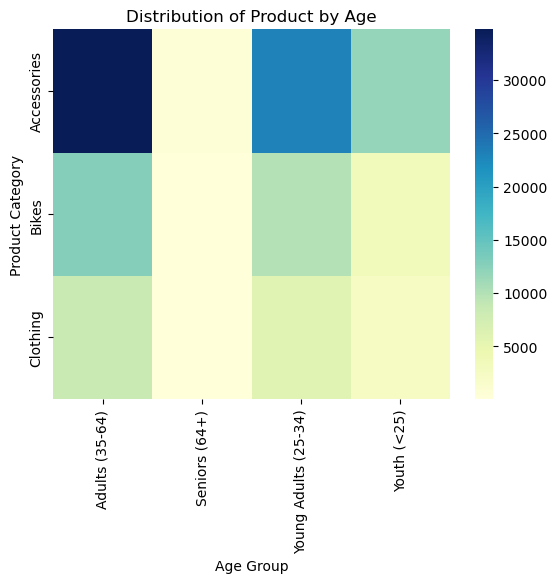

In [9]:
# We want to establish what product was more famous among each age group. For this we need a heatmap 
# From this heatmap, we can tell clothing is by far the least bought item across all age groups. 
# Accessories are the most common across all age groups. 
pivot_table = sales.pivot_table(index = "Product_Category", columns = "Age_Group", aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, cmap = "YlGnBu", fmt = 'd')
plt.title("Distribution of Product by Age")
plt.xlabel("Age Group")
plt.ylabel("Product Category")
plt.show()

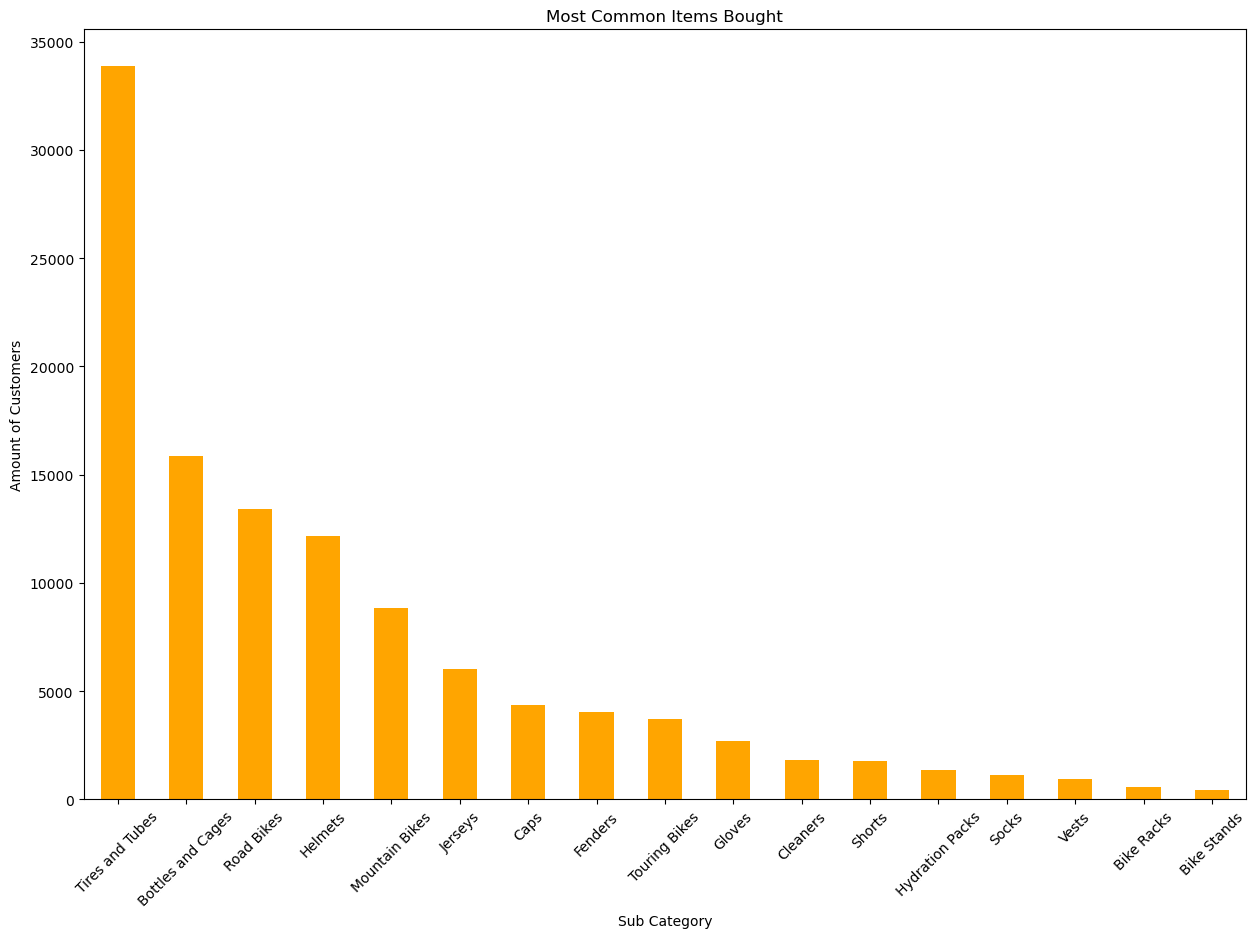

In [10]:
# Next we use a bar plot to visualise the sub categories to get a better understanding of customer purchases
# Calculating the frequency of each sub-category
sub_category_counts = sales['Sub_Category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(15, 10))
sub_category_counts.plot(kind='bar', color='orange')
plt.xlabel("Sub Category")
plt.ylabel("Amount of Customers")
plt.title("Most Common Items Bought")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# From the bar plot, we can further deduce that the most common item bought was tires and tubes, while bike stands were least bought.

In [11]:
sales['Total_Revenue'] = sales['Order_Quantity'] * sales['Unit_Price']
category_revenue = sales.groupby('Product_Category')['Total_Revenue'].sum().sort_values(ascending=False)
category_revenue

Product_Category
Bikes          69208196
Accessories    16712646
Clothing        9255476
Name: Total_Revenue, dtype: int64

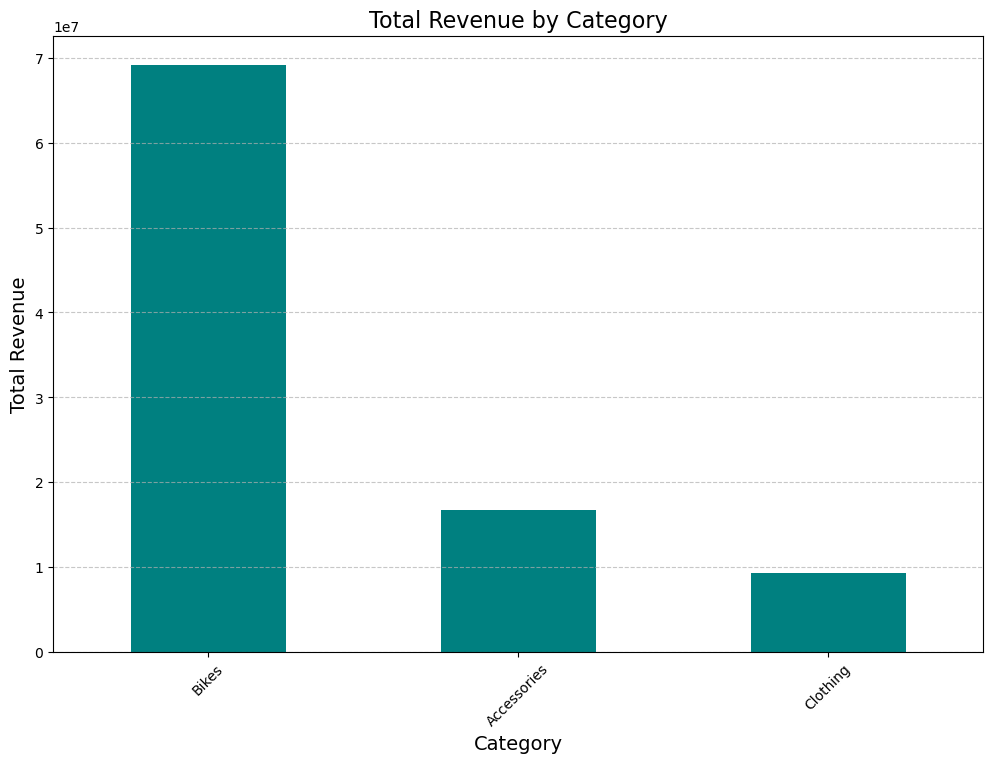

In [12]:
# Now we plot a barplot to see which category generated the most revenue
plt.figure(figsize=(12, 8))
category_revenue.plot(kind='bar', color='teal')
plt.title("Total Revenue by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='Product_Category', ylabel='count'>

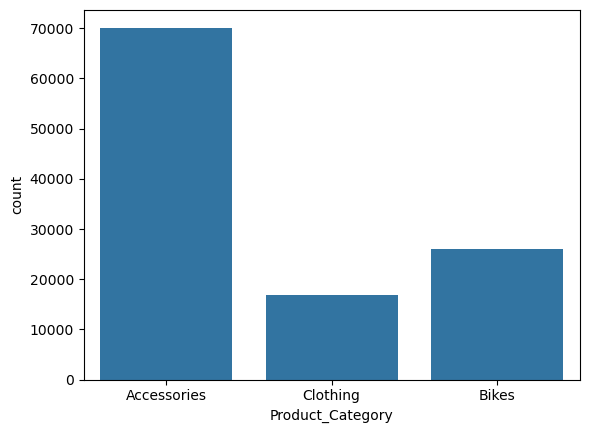

In [13]:
# Next we check to see which category was most common across the years. From this bar plot and the previous one, 
# We can see that bikes account for most of the revenue (profit) despite being only the second most bought item
sns.countplot(x = sales['Product_Category'])

In [14]:
sales['Revenue'] = sales['Order_Quantity'] * sales['Unit_Price']
category_revenue_gender = sales.groupby(['Product_Category', 'Customer_Gender'])['Revenue'].sum()
category_revenue_gender

Product_Category  Customer_Gender
Accessories       F                   7837694
                  M                   8874952
Bikes             F                  34746352
                  M                  34461844
Clothing          F                   4261396
                  M                   4994080
Name: Revenue, dtype: int64

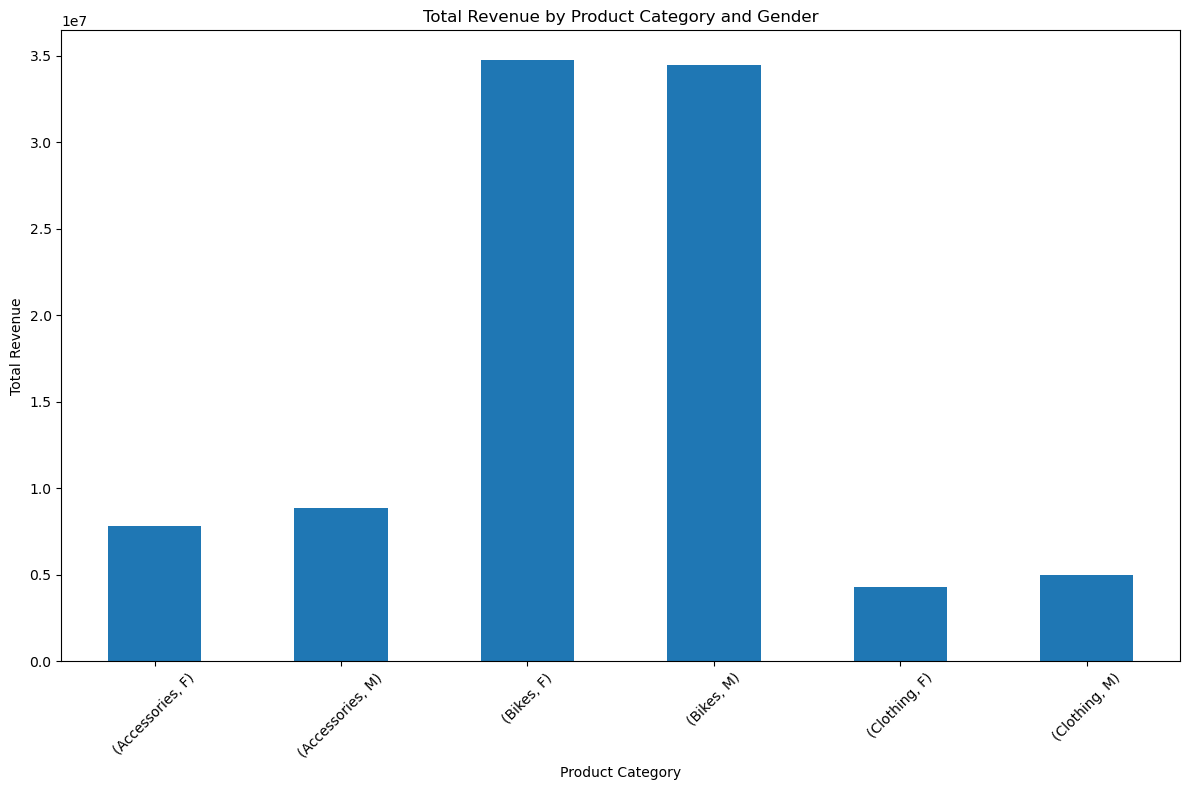

In [15]:
# Next we want to know how much revebue was generated for each category of product for men and women
# From the bar plots, we can see that there is not that much of a difference in revenue generated by men and women.
sales['Revenue'] = sales['Order_Quantity'] * sales['Unit_Price']
category_revenue_gender = sales.groupby(['Product_Category', 'Customer_Gender'])['Revenue'].sum()
category_revenue_gender.plot(kind='bar', figsize=(12, 8))
plt.title("Total Revenue by Product Category and Gender")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Now we would want to know the total revenue by Country and State using the same formula
sales['Revenue_Country_State'] = sales['Order_Quantity'] * sales['Unit_Price']
category_revenue_country_state = sales.groupby(['Country', 'State'])['Revenue_Country_State'].sum()
category_revenue_country_state

Country         State              
Australia       New South Wales        10578395
                Queensland              6031003
                South Australia         1703953
                Tasmania                 716272
                Victoria                6397963
Canada          Alberta                   56803
                British Columbia        7956518
                Ontario                    1215
France          Charente-Maritime        108211
                Essonne                 1014122
                Garonne (Haute)          195629
                Hauts de Seine          1007645
                Loir et Cher              92725
                Loiret                   365343
                Moselle                  302509
                Nord                    1522560
                Pas de Calais             59295
                Seine (Paris)           2003989
                Seine Saint Denis       1379987
                Seine et Marne           455223
    

In [17]:
df = pd.DataFrame(category_revenue_country_state)
df

Revenue_Country_State
Country        State                                     
Australia      New South Wales                   10578395
               Queensland                         6031003
               South Australia                    1703953
               Tasmania                            716272
               Victoria                           6397963
Canada         Alberta                              56803
               British Columbia                   7956518
               Ontario                               1215
France         Charente-Maritime                   108211
               Essonne                            1014122
               Garonne (Haute)                     195629
               Hauts de Seine                     1007645
               Loir et Cher                         92725
               Loiret                              365343
               Moselle                             302509
               Nord                               1522560
               Pas de Calais                        59295
               Seine (Paris)                      2003989
               Seine Saint Denis                  1379987
               Seine et Marne                      455223
               Somme                               124609
               Val d'Oise                          187705
               Val de Marne                        118270
               Yveline                             909391
Germany        Bayern                             1355458
               Brandenburg                         171468
               Hamburg                            1676289
               Hessen                             2229398
               Nordrhein-Westfalen                2074581
               Saarland                           2475009
United Kingdom England                           11090006
United States  Alabama                                210
               Arizona                               9379
               California                        18032833
               Florida                              11590
               Georgia                               5172
               Illinois                             21889
               Kentucky                              4172
               Massachusetts                         4640
               Minnesota                             1666
               Mississippi                           1914
               Missouri                              1976
               Montana                               2278
               New York                              6041
               North Carolina                         465
               Ohio                                 11331
               Oregon                             4012077
               South Carolina                        1514
               Texas                                 8437
               Utah                                  5046
               Virginia                              1485
               Washington                         8642489
               Wyoming                              28170